# <a>Projeto 1 - Análise Exploratória de Dados<a>

## <a> Motivação </a>

Em qualquer empreitada de Ciência de Dados, esta etapa é crucial. É aqui que mergulhamos nos dados, desvendamos suas 
distribuições, extraímos medidas estatísticas fundamentais e desenhamos correlações. Essa imersão inicial não só gera 
insights valiosos, mas também é essencial para desvendar desafios e propor soluções.

Esta fase é verdadeiramente híbrida. Pode ser uma jornada de descoberta sem um objetivo claro, onde buscamos informações e 
insights. Ou pode ser direcionada, quando estamos focados em responder perguntas de negócio específicas (fase 1 do CRISP-DM).

## <a> Objeto de Estudo </a>

Nossa análise será fundamentada em microdados do ENEM de 2019. Segundo o INEP, o ENEM tem o propósito de avaliar o desempenho dos estudantes ao término da educação básica. Suas notas abrem portas para o Sisu, ProUni e também são reconhecidas por mais de 50 instituições de ensino superior em Portugal. Além disso, os participantes podem acessar programas governamentais como o Fies.

Compreender os dados dos candidatos pode fornecer insights cruciais para aprimorar a educação no Brasil. Neste estudo, exploraremos se dados demográficos, indicadores sociais, e o nível de escolaridade dos pais, entre outros, estão correlacionados com as notas dos participantes. Muitas respostas e insights podem emergir apenas com esta análise exploratória.

In [183]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [184]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [185]:
df_enem = pd.read_parquet('C:/Users/marci/Downloads/Downloads/enem_2019_amostra_10.parquet')

In [186]:
df_enem.shape

(509527, 136)

In [187]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,190005708034,2019,2305506,Iguatu,23,CE,22.00,F,1,3,1,2305506.00,Iguatu,23.00,CE,1,3,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2305506,Iguatu,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,190003326900,2019,3548500,Santos,35,SP,19.00,F,1,1,1,3548500.00,Santos,35.00,SP,1,1,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3548500,Santos,35,SP,1,1,1,1,503.00,508.00,512.00,515.00,543.90,527.70,545.30,513.90,ACDDCEDEDCCBCBBBBAACECADABAEBBDEEACCECBBCBDDC,ACAABDBEEAABDCCAACBEEDCBDEDBBCCCBCEBDDCABCCBB,BBEEA99999DEEBECBBCACDEAABEEBBECEBAAEDCBECADCE...,EBBADECCAEBBCDECCAEBCABDBCDEBBADBDCABAEBDCCEC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,190004261548,2019,3552106,Socorro,35,SP,16.00,F,1,1,1,3552106.00,Socorro,35.00,SP,3,0,1,NaN,1,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552106,Socorro,35,SP,1,1,1,1,504.00,509.00,514.00,516.00,406.10,521.20,549.20,510.50,ADCAEDAEADACDCBACEDEABCEBBAEBABBACEEDEACAABCD,ADACCCACDBAABBBDBAEABCCEACAABDEBAECAEDAEDAACE,99999ABCABBAEBCDEDEBDAADCEDCDECBDBDBBECAEDCCBC...,BECACAABACBCABCACDACBDCCDACAAEBCECAECEBCAECEE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,190001849598,2019,3541000,Praia Grande,35,SP,22.00,M,1,1,1,3541000.00,Praia Grande,35.00,SP,1,5,1,1.00,0,NaN,NaN,None,N

In [188]:
len(df_enem['NU_INSCRICAO'].unique())
#VERIFICANDO SE REPETE

509527

In [189]:
df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

In [190]:
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [191]:
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [192]:
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [193]:
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B


In [194]:
# Descrever todas as colunas do DataFrame
df_enem.describe()


,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,509519.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,287993.00,509527.00,114894.00,114894.00,114894.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,509527.00,371475.00,392613.00,392613.00,371475.00,509527.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,392613.00,509527.00
mean,22.10,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.66,507.25,520.46,522.92,0.52,1.14,120.49,122.73,114.82,121.66,91.60,571.30,3.87
std,7.47,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.04,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.04,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.44,0.42,0.42,0.44,76.00,82.22,64.02,108.94,0.50,0.79,33.40,42.93,40.17,38.14,59.45,188.74,1.48
min,12.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,448.00,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [195]:
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [196]:
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

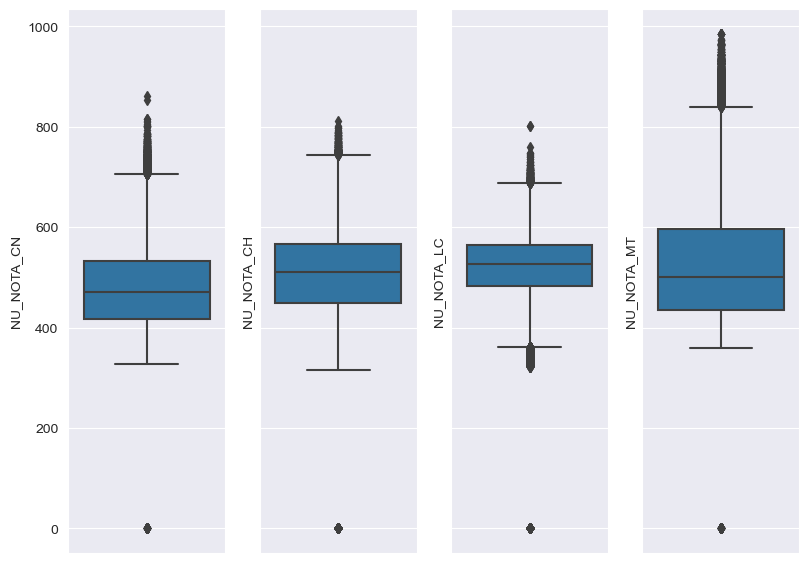

In [197]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1,4, sharey= True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1=colunas_notas[i]
    sns.boxplot(data = df_enem, y = coluna_1, ax=graficos[i])


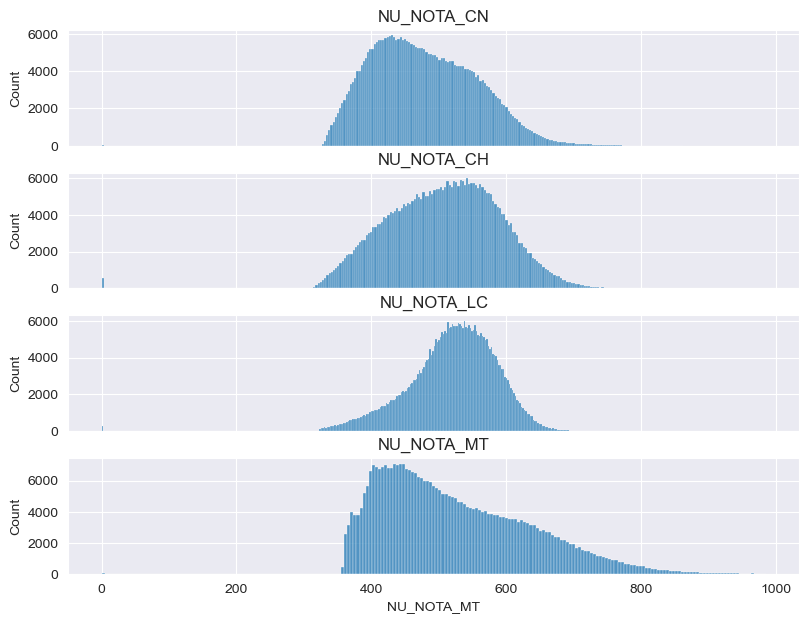

In [198]:
#Distrubuição das notas
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4,1, sharex= True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1=colunas_notas[i]
    sns.histplot(data = df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='Density'>

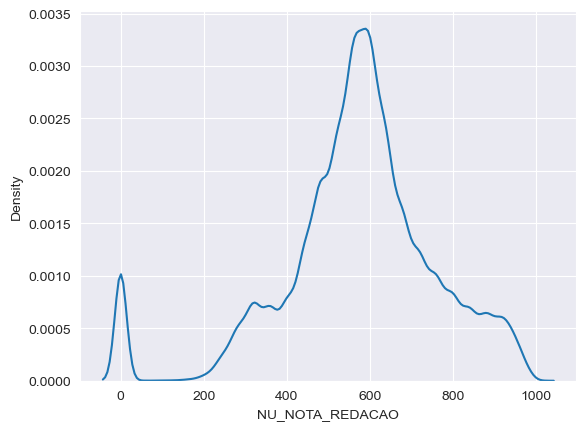

In [199]:
sns.kdeplot(data= df_enem['NU_NOTA_REDACAO'])

In [200]:
#ANALISE DOS CANDIDATOS

In [201]:
df_enem['NU_IDADE'].value_counts().sort_index()

12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00     

<Axes: xlabel='NU_IDADE', ylabel='Density'>

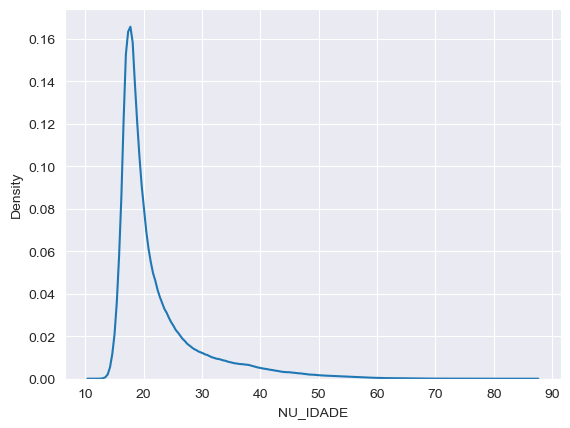

In [202]:
sns.kdeplot(data=df_enem['NU_IDADE'])

In [203]:
df_enem['TP_SEXO'].value_counts().sort_index()

F    303139
M    206388
Name: TP_SEXO, dtype: int64

In [204]:
df_enem['TP_SEXO'].value_counts(normalize = True).sort_index()

F   0.59
M   0.41
Name: TP_SEXO, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

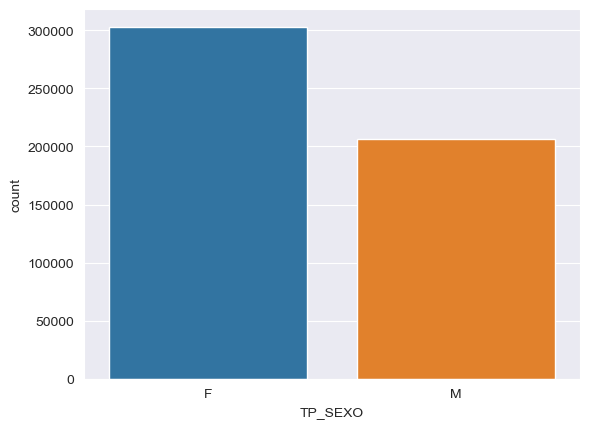

In [205]:
sns.countplot(data= df_enem, x = 'TP_SEXO')

In [206]:
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     20345
1    439950
2     39834
3      8763
4       635
Name: TP_ESTADO_CIVIL, dtype: int64

In [207]:
df_enem['TP_ESTADO_CIVIL'].value_counts(normalize = True).sort_index()

0   0.04
1   0.86
2   0.08
3   0.02
4   0.00
Name: TP_ESTADO_CIVIL, dtype: float64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

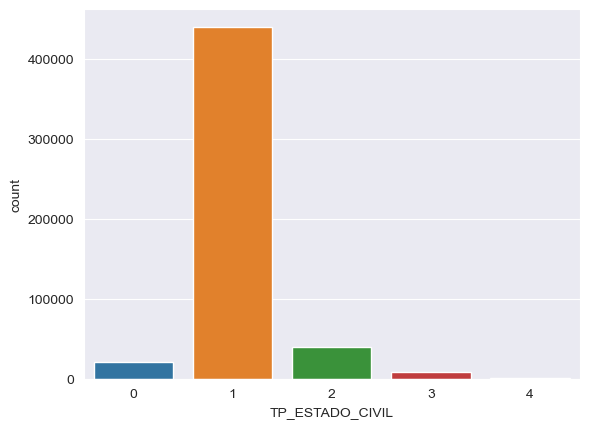

In [208]:
sns.countplot(data = df_enem, x= 'TP_ESTADO_CIVIL')

In [209]:
#0 Não declarado
#1 Branca
#2 Preta
#3 Parda
#4 Amarela
#5 Indígena
df_enem['TP_COR_RACA'].value_counts(normalize = True).sort_index()

0   0.02
1   0.36
2   0.13
3   0.46
4   0.02
5   0.01
Name: TP_COR_RACA, dtype: float64

In [210]:
df_enem['TP_COR_RACA'].value_counts().sort_index()

0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: TP_COR_RACA, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

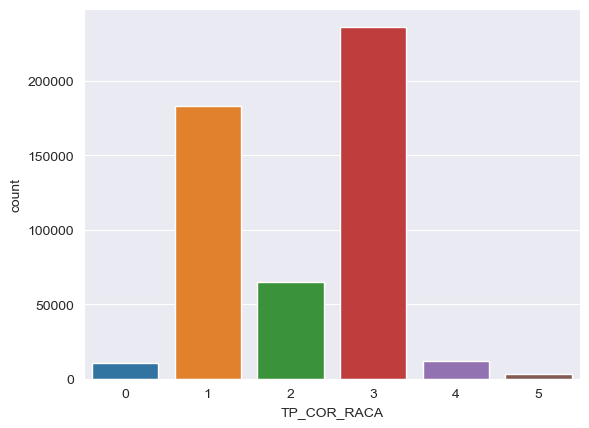

In [211]:
sns.countplot(data = df_enem, x= 'TP_COR_RACA')

In [212]:
ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SP    81333
MG    53702
BA    39880
RJ    34042
CE    29581
PA    27861
PE    27051
MA    22157
RS    21989
PR    20829
GO    17074
PB    14891
PI    12134
RN    11781
AM    11737
SC    10896
ES    10239
DF     9485
AL     9283
MT     8757
SE     7714
MS     7057
RO     5804
TO     4693
AP     4319
AC     3955
RR     1283
Name: SG_UF_RESIDENCIA, dtype: int64

In [213]:
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values})
df_ufs.head

<bound method NDFrame.head of     uf  candidatos
0   SP       81333
1   MG       53702
2   BA       39880
3   RJ       34042
4   CE       29581
5   PA       27861
6   PE       27051
7   MA       22157
8   RS       21989
9   PR       20829
10  GO       17074
11  PB       14891
12  PI       12134
13  RN       11781
14  AM       11737
15  SC       10896
16  ES       10239
17  DF        9485
18  AL        9283
19  MT        8757
20  SE        7714
21  MS        7057
22  RO        5804
23  TO        4693
24  AP        4319
25  AC        3955
26  RR        1283>

In [214]:
import plotly.express as px

fig = px.treemap(data_frame = df_ufs, path = ['uf'], values = 'candidatos')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l = 25, r =25, b=25))
fig.show()

In [215]:
# Até que série seu pai, ou o homem responsável por você, estudou?
'''
A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.
'''

df_enem['Q001'].value_counts().sort_index()

A     29079
B    113489
C     72236
D     58789
E    130900
F     37494
G     22957
H     44583
Name: Q001, dtype: int64

In [216]:
#qnts nn responderam? (pra pai)
len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.0874987979047234

In [217]:
df_enem['Q002'].value_counts().sort_index()

A     19580
B     85678
C     68403
D     67117
E    162963
F     51384
G     39806
H     14596
Name: Q002, dtype: int64

In [218]:
#qnts nn responderam? (pra mae)
len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.028646175766936788

In [219]:
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])

In [220]:
df_enem['pai_possui_superior'].value_counts(normalize=True) *100

False   88.14
True    11.86
Name: pai_possui_superior, dtype: float64

In [221]:
df_enem['mae_possui_superior'].value_counts(normalize=True) *100

False   82.10
True    17.90
Name: mae_possui_superior, dtype: float64

In [222]:
# Analisar a renda familiar. Vamos transformar Q006 em algo numérico?

'''
A Nenhuma renda.
B Até R$ 998,00.
C De R$ 998,01 até R$ 1.497,00.
D De R$ 1.497,01 até R$ 1.996,00.
E De R$ 1.996,01 até R$ 2.495,00.
F De R$ 2.495,01 até R$ 2.994,00.
G De R$ 2.994,01 até R$ 3.992,00.
H De R$ 3.992,01 até R$ 4.990,00.
I De R$ 4.990,01 até R$ 5.988,00.
J De R$ 5.988,01 até R$ 6.986,00.
K De R$ 6.986,01 até R$ 7.984,00.
L De R$ 7.984,01 até R$ 8.982,00.
M De R$ 8.982,01 até R$ 9.980,00.
N De R$ 9.980,01 até R$ 11.976,00.
O De R$ 11.976,01 até R$ 14.970,00.
P De R$ 14.970,01 até R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''
from string import ascii_uppercase

dicionario_renda = dict()

for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

dicionario_renda

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [223]:
df_enem['Q006'].value_counts()

C    131131
B    127512
D     49732
E     47487
G     30203
A     23258
F     22640
H     19420
I     14225
J      8161
N      6081
Q      5841
K      5811
O      4968
L      4474
P      4320
M      4263
Name: Q006, dtype: int64

In [224]:
df_enem['renda familiar'] = df_enem['Q006'].map(dicionario_renda)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior,renda familiar
5089962,CE,22.00,F,1,3,1,CE,1,3,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,D,B,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,B,A,B,B,False,False,1
1968816,SP,19.00,F,1,1,1,SP,1,1,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,543.90,527.70,545.30,513.90,0,1.00,140.00,140.00,140.00,120.00,140.00,680.00,E,E,B,B,4,I,A,B,C,A,A,B,B,B,A,B,A,A,B,A,B,E,B,B,B,False,False,8
3432726,SP,16.00,F,1,1,1,SP,3,0,1,NaN,1,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,406.10,521.20,549.20,510.50,1,1.00,120.00,120.00,120.00,120.00,0.00,480.00,F,F,B,D,4,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,E,A,B,B,True,True,8
637236,SP,22.00,M,1,1,1,SP,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,1,1,1,1,520.50,488.00,549.20,599.40,0,1.00,120.00,140.00,120.00,120.00,0.00,500.00,D,E,B,D,5,F,A,B,C,A,A,B,B,A,A,B,A,A,C,A,B,C,B,B,B,False,False,5
2759179,PR,17.00,M,1,1,1,PR,2,0,3,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PR,1,1,1,1,577.10,587.00,610.70,747.00,0,1.00,160.00,180.00,160.00,180.00,100.00,780.00,E,D,C,B,4,G,A,B,C,B,A,B,B,B,A,B,A,B,B,A,B,B,B,C,B,False,False,6


<Axes: xlabel='renda familiar', ylabel='count'>

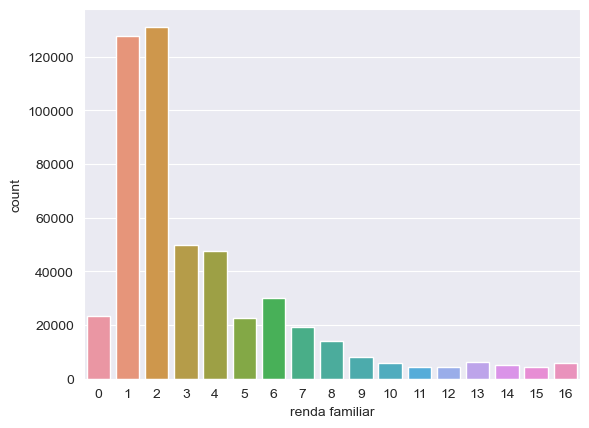

In [225]:
sns.countplot(data=df_enem, x='renda familiar')

#RELACIONAR NOTAS COM CARACTÉRISTICAS DOS CANDIDATOS

In [226]:
#Df com notas e sexo dos candidatos

In [227]:
df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
5089962,NaN,NaN,NaN,NaN,NaN,F
1968816,543.90,527.70,545.30,513.90,680.00,F
3432726,406.10,521.20,549.20,510.50,480.00,F
637236,520.50,488.00,549.20,599.40,500.00,M
2759179,577.10,587.00,610.70,747.00,780.00,M


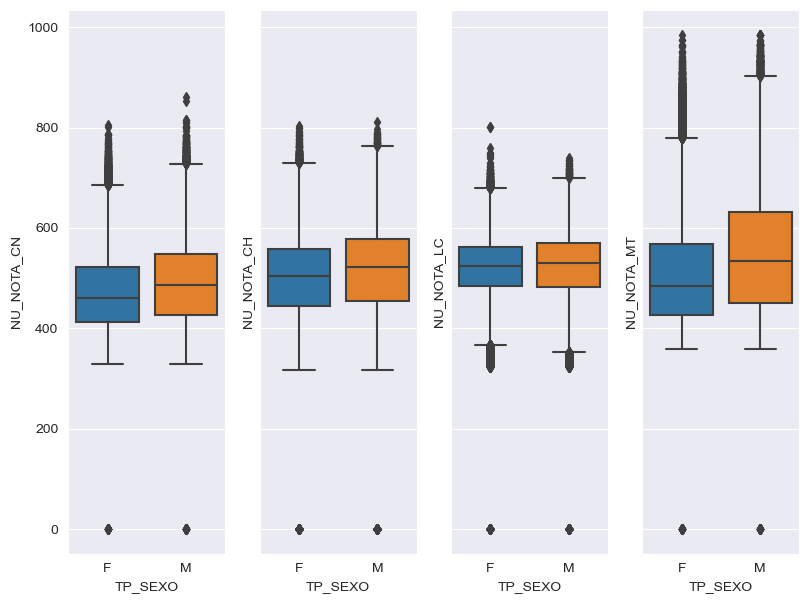

In [228]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey= True, figsize=(8,6))
plt.tight_layout()

for i in range (4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data = df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i])
    

In [229]:
#Df com cor e raça dos candidatos


0 Não Declarado
1 Branca
2 Preta
3 Parda
4 Amarela
5 Indígena



In [230]:
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
5089962,NaN,NaN,NaN,NaN,NaN,3
1968816,543.90,527.70,545.30,513.90,680.00,1
3432726,406.10,521.20,549.20,510.50,480.00,1
637236,520.50,488.00,549.20,599.40,500.00,1
2759179,577.10,587.00,610.70,747.00,780.00,1


In [231]:
#Analisando notas pela raça/cor

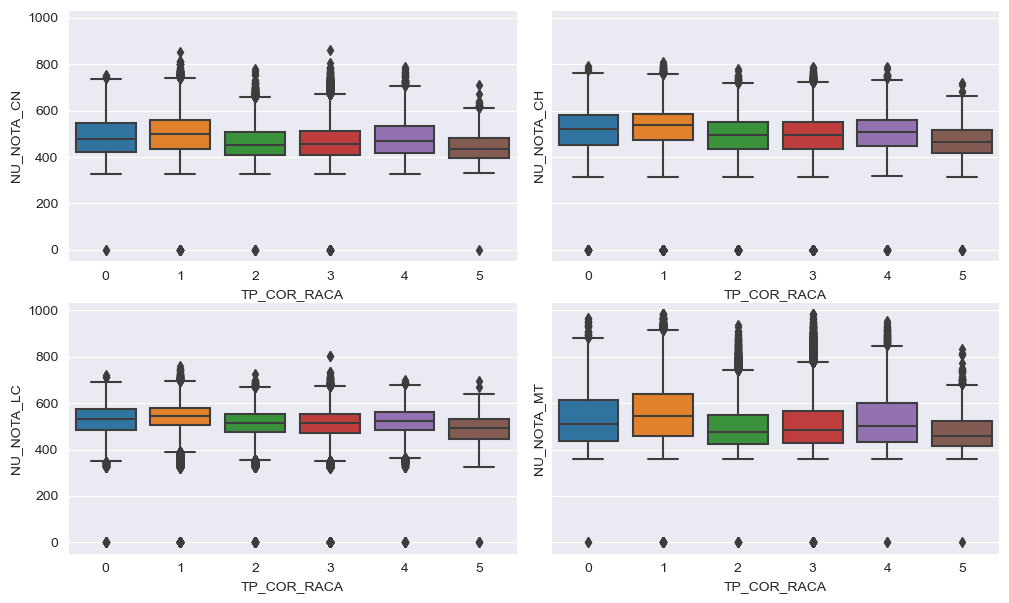

In [232]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey= True, figsize=(10,6))
plt.tight_layout()

for i in range (2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot(data = df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data = df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

    

In [233]:
# Calcular atendimento especializado 
colunas_atendimento_especializado = ['IN_BAIXA_VISAO',
                                     'IN_CEGUEIRA', 
                                     'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 
                                     'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 
                                     'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 
                                     'IN_DISLEXIA', 'IN_DISCALCULIA', 
                                     'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 
                                     'IN_OUTRA_DEF']

df_atendimento_especializado = df_enem.loc[:, colunas_notas]
df_atendimento_especializado['atendimento_especializado'] = df_enem.loc[:, colunas_atendimento_especializado].sum(axis=1) > 0
df_atendimento_especializado.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,atendimento_especializado
5089962,NaN,NaN,NaN,NaN,NaN,False
1968816,543.90,527.70,545.30,513.90,680.00,False
3432726,406.10,521.20,549.20,510.50,480.00,False
637236,520.50,488.00,549.20,599.40,500.00,False
2759179,577.10,587.00,610.70,747.00,780.00,False


In [234]:
df_atendimento_especializado['atendimento_especializado'].value_counts()

False    506207
True       3320
Name: atendimento_especializado, dtype: int64

In [235]:
df_atendimento_especializado['atendimento_especializado'].value_counts(normalize=True) * 100

False   99.35
True     0.65
Name: atendimento_especializado, dtype: float64

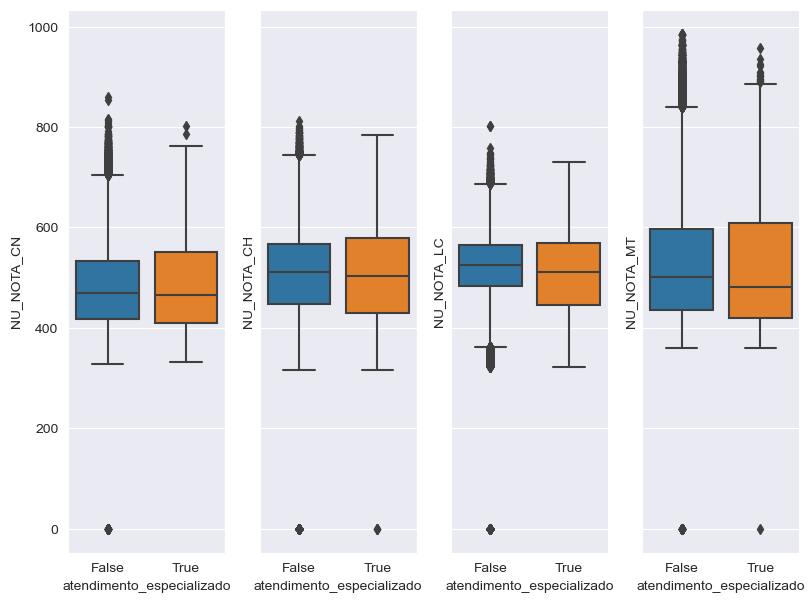

In [236]:
# Análise das notas por atendimento especializado
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_atendimento_especializado, y=coluna_1, x='atendimento_especializado', ax=graficos[i])

In [237]:
#A partir do nível do superior dos pais

In [238]:
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
5089962,NaN,NaN,NaN,NaN,NaN,False,False
1968816,543.90,527.70,545.30,513.90,680.00,False,False
3432726,406.10,521.20,549.20,510.50,480.00,True,True
637236,520.50,488.00,549.20,599.40,500.00,False,False
2759179,577.10,587.00,610.70,747.00,780.00,False,False


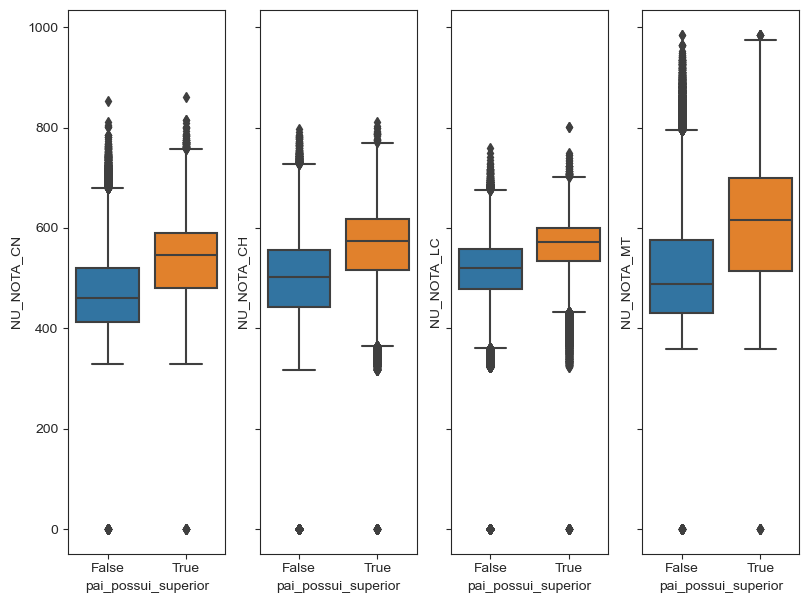

In [239]:
# Análise das notas por instrução do pai
sns.set_style("ticks")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

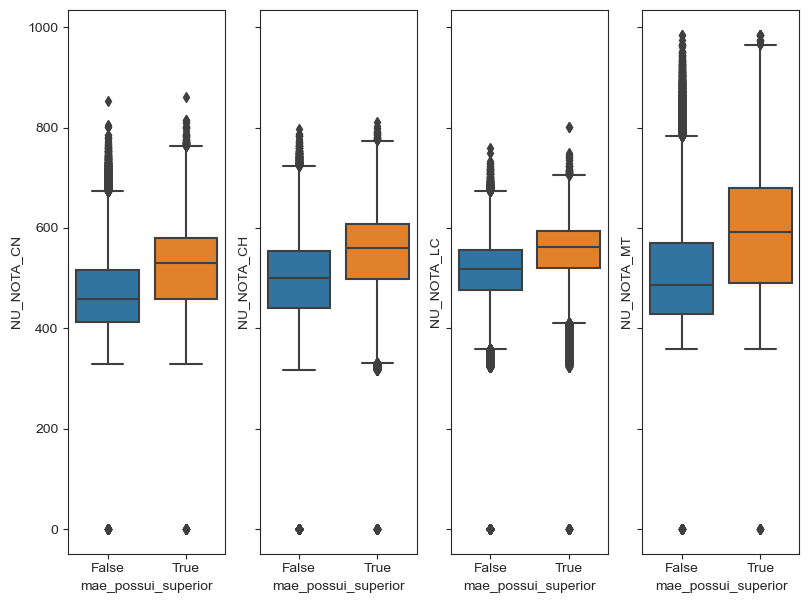

In [240]:
# Análise das notas por instrução da mãe.
sns.set_style("ticks")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

In [241]:
#Correlação de Idades e notas

<Axes: xlabel='NU_IDADE', ylabel='NU_NOTA_CN'>

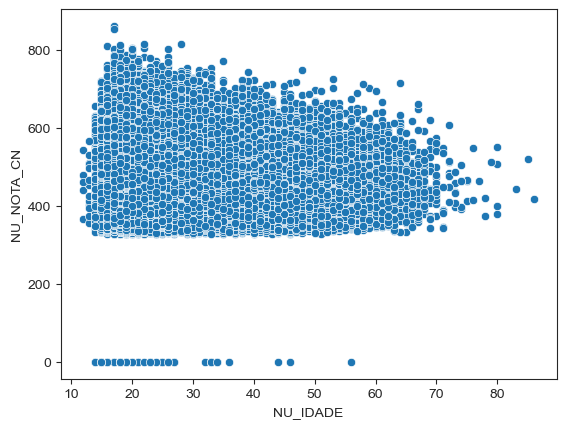

In [242]:
df_idade = df_enem.loc[:, colunas_notas +['NU_IDADE']]

sns.scatterplot(data=df_idade, x='NU_IDADE', y='NU_NOTA_CN')

<Axes: >

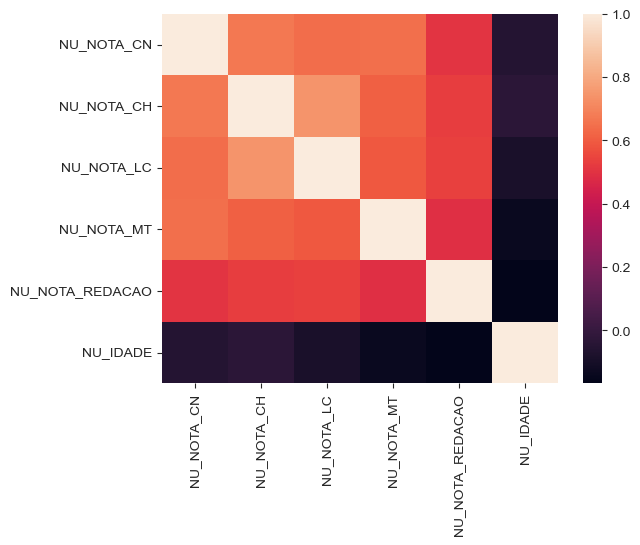

In [243]:
#Correlação de Pearson
correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade)

In [244]:
#Correlação de renda e nota

<Axes: xlabel='Q006', ylabel='NU_NOTA_CN'>

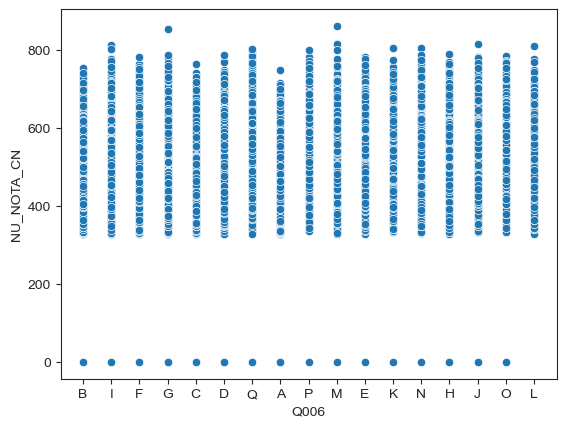

In [245]:
df_renda = df_enem.loc[:, colunas_notas + ['Q006']]

sns.scatterplot(data=df_renda, x='Q006', y='NU_NOTA_CN')

C:\Users\marci\AppData\Local\Temp\ipykernel_11320\2475021538.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

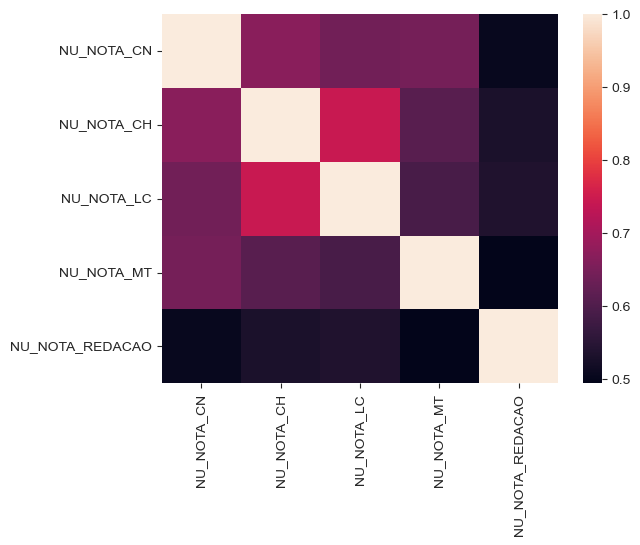

In [246]:
#Correlação de Pearson
correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)

In [248]:
#A partir da Nacionalidade
df_nacionalidade = df_enem.loc[:, colunas_notas + ['TP_NACIONALIDADE']]
df_nacionalidade.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_NACIONALIDADE
5089962,NaN,NaN,NaN,NaN,NaN,1
1968816,543.90,527.70,545.30,513.90,680.00,1
3432726,406.10,521.20,549.20,510.50,480.00,1
637236,520.50,488.00,549.20,599.40,500.00,1
2759179,577.10,587.00,610.70,747.00,780.00,1


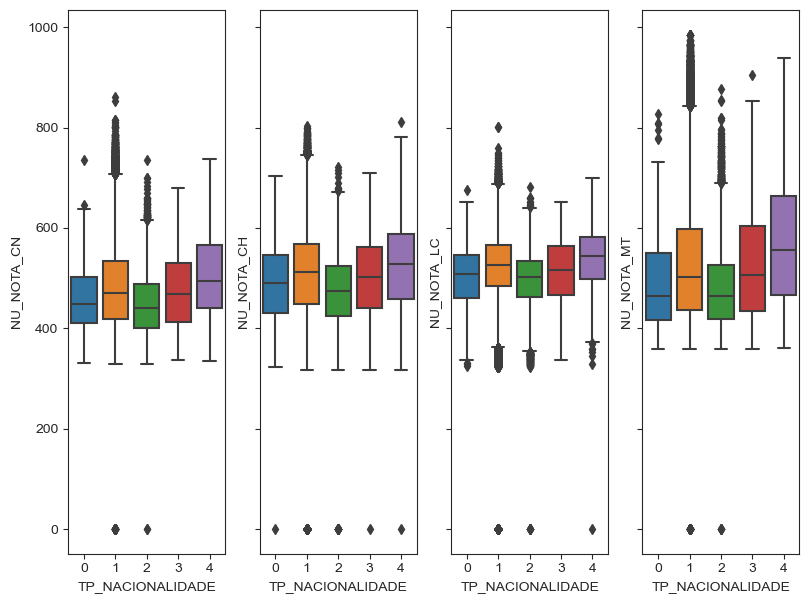

In [249]:
# Análise das notas por nacionalidade.
sns.set_style("ticks")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_nacionalidade, y=coluna_1, x='TP_NACIONALIDADE', ax=graficos[i])

## <a> Conclusões </a>

Após minuciosa análise dos dados com o intuito de investigar possíveis associações entre as características dos candidatos e suas respectivas notas, observamos indícios de correlações entre as notas e os seguintes fatores:

-Raça, com destaque para candidatos de origem indígena.

-Escolaridade dos pais, particularmente evidente na influência sobre as notas de matemática.

-Renda familiar, especialmente em relação às notas de matemática, onde a correlação atinge pouco acima de 0,5.

Por outro lado, não encontramos evidências significativas na amostra para correlações entre as notas e variáveis como sexo, idade ou necessidade de atendimento especializado.

Foi notável que a grande maioria dos candidatos pertence a famílias de renda considerada "humilde", com renda familiar inferior a R$2.000,00.

O perfil típico do candidato do ENEM revelado pelos dados é o de uma mulher solteira, parda, com 18 anos de idade, proveniente de uma família com renda mensal inferior a R$1.500,00, cujos pais não possuem ensino superior completo.





